# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Montando o data frame princial

In [2]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados/datatran2021.csv',
 'dados/datatran2009.csv',
 'dados/datatran2007.csv',
 'dados/datatran2017.csv',
 'dados/datatran2013.csv',
 'dados/datatran2008.csv',
 'dados/datatran2012.csv',
 'dados/datatran2015.csv',
 'dados/datatran2016.csv',
 'dados/datatran2010.csv',
 'dados/datatran2019.csv',
 'dados/datatran2020.csv',
 'dados/datatran2011.csv',
 'dados/datatran2018.csv',
 'dados/datatran2014.csv',
 'dados/datatran2022.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [4]:
dataframes = []

for file in files:
    # try:
    #     dataframes.append(pd.read_csv(file, delimiter=';', low_memory=False))
    # except:
    dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1', low_memory=False))

df_final = pd.concat(dataframes, axis=0)
df_sem_duplicatas = df_final.copy()
df_sem_duplicatas['count'] = 1

In [5]:
df_final.duplicated().sum()

0

In [6]:
print(len(df_final))
print(len(df_sem_duplicatas))

1981317
1981317


# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [7]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return str(re.search(regex1, year).group(1))
    else:
        return str('20' + re.search(regex2, year).group(3))

In [8]:
df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)
df_sem_duplicatas = df_sem_duplicatas.astype({'ano': str})
df_sem_duplicatas['ano'] = df_sem_duplicatas['ano'].apply(lambda ano: ano.split('.')[0], 1)

In [9]:
df_sem_duplicatas['ano'].unique()

array(['2021', '2009', '2007', '2017', '2013', '2008', '2012', '2015',
       '2016', '2010', '2019', '2020', '2011', '2018', '2014', '2022'],
      dtype=object)

In [10]:
df_sem_duplicatas[['ano']].isnull().sum()

ano    0
dtype: int64

In [11]:
df_sem_duplicatas.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'ano', 'count'],
      dtype='object')

In [12]:
df_sem_duplicatas['pessoas']

0        1
1        6
2        3
3        2
4        3
        ..
64542    4
64543    1
64544    2
64545    2
64546    2
Name: pessoas, Length: 1981317, dtype: int64

In [13]:
df_sem_duplicatas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,count
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,1,4,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,1,2,2,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,2,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ,2021,1
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393.0,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,0,2,2,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64542,516543.0,2022-11-06,domingo,20:00:00,PI,316.0,313,PICOS,Ausência de reação do condutor,Colisão transversal,...,2,1,2,"-7,07959049","-41,44975182",SPRF-PI,DEL04-PI,UOP01-DEL04-PI,2022,1
64543,516703.0,2022-05-03,terça-feira,02:30:00,ES,262.0,17,VIANA,Velocidade Incompatível,Saída de leito carroçável,...,1,0,1,"-20,38635961","-40,47272969",SPRF-ES,DEL01-ES,UOP01-DEL01-ES,2022,1
64544,516707.0,2022-11-29,terça-feira,19:00:00,MG,146.0,459,BOTELHOS,Transitar na contramão,Colisão frontal,...,0,2,2,"-21,62224461","-46,40968323",SPRF-MG,DEL09-MG,UOP01-DEL09-MG,2022,1
64545,516846.0,2022-07-31,domingo,09:54:00,CE,116.0,5,FORTALEZA,Manobra de mudança de faixa,Tombamento,...,1,1,2,"-3,79654632","-38,50665092",SPRF-CE,DEL01-CE,UOP02-DEL01-CE,2022,1


In [14]:
df_sem_duplicatas['ano'].value_counts()

ano
2011    192326
2013    186748
2012    184568
2010    183469
2014    169201
2009    158646
2008    141043
2007    127675
2015    122161
2016     96363
2017     89567
2018     69332
2019     67556
2022     64547
2021     64539
2020     63576
Name: count, dtype: int64

In [15]:
df_sem_duplicatas.groupby(['uf', 'ano'])['count'].sum().reset_index()

,uf,ano,count
0,(null),2007,5
1,(null),2008,3
2,(null),2012,4
3,AC,2007,324
4,AC,2008,353
...,...,...,...
430,TO,2018,589
431,TO,2019,520
432,TO,2020,595
433,TO,2021,501


# Graficos

In [16]:

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

book_colors = {
    'my_blue':'#1e83af',
    'my_red': '#9c1416',
    'my_green': '#1a7512',
    'cinza': '#ABA7A8',
    'rosa_escuro': '#CC527A',
    'rosa': '#E8175D',
    'preto_claro': '#474747',
    'preto': '#363636',
}

font = {
    'family': 'serif',
    'color':  book_colors['preto'],
    'weight': 'normal',
    'size': 16,
}

/tmp/ipykernel_8043/836813060.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x800 with 0 Axes>

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [18]:
def grafico_simples(data: pd.core.frame.DataFrame, 
                    eixo_x: str, 
                    eixo_y: str, 
                    title:str, 
                    y_label: str, 
                    x_label: str,
                    color: str = book_colors['my_blue']) -> None:
    
    X, Y = data[eixo_x], data[eixo_y].values

    plt.title(title)
#     ax=plt.axes()
#     ax.set_facecolor('white')
    plt.bar(X, Y, color=color, label=eixo_y, width=0.8)
    addlabels(X, Y)
    plt.legend(loc="upper right")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.show()

In [19]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127675
1,2008,141043
2,2009,158646
3,2010,183469
4,2011,192326
5,2012,184568
6,2013,186748
7,2014,169201
8,2015,122161
9,2016,96363


## Gráfico da queda dos acidentes 

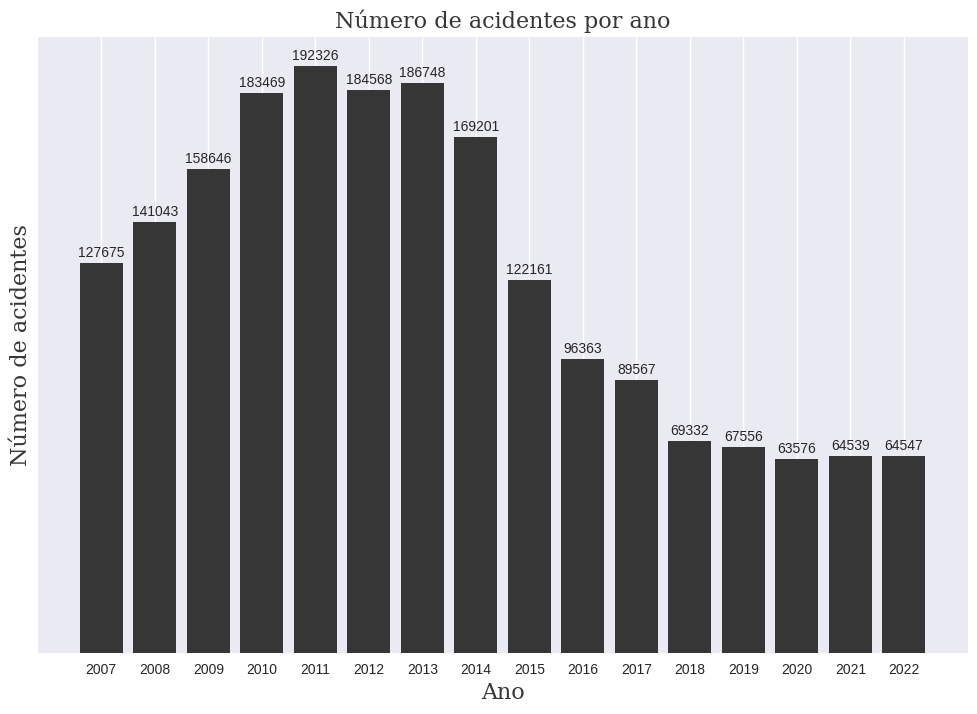

In [20]:
df_acidentes_count = df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12, 8))

X, Y = df_acidentes_count['ano'], df_acidentes_count['count'].values

plt.title('Número de acidentes por ano', fontdict=font)
plt.bar(X, Y, color=book_colors['preto'], width=0.8)

for i in range(len(X)):
        plt.text(i, Y[i] + 2000 , Y[i], ha = 'center')

plt.xlabel('Ano', fontdict=font)
plt.ylabel('Número de acidentes', fontdict=font)
plt.yticks([])
plt.show()

## Gráfico de causas de acidente 2022

In [21]:
causas_acidentes_pb = df_sem_duplicatas.loc[((df_sem_duplicatas['uf'] == 'PB') &  \
                                            (df_sem_duplicatas['ano'] == '2019'))].groupby('causa_acidente')['count'].sum().reset_index()
causas_acidentes_pb = causas_acidentes_pb.sort_values('count', ascending=False).reset_index(drop=True)
causas_acidentes_pb

,causa_acidente,count
0,Falta de Atenção à Condução,424
1,Desobediência às normas de trânsito pelo condutor,215
2,Não guardar distância de segurança,184
3,Ingestão de Álcool,155
4,Velocidade Incompatível,133
5,Defeito Mecânico no Veículo,71
6,Animais na Pista,70
7,Condutor Dormindo,64
8,Falta de Atenção do Pedestre,48
9,Pista Escorregadia,42


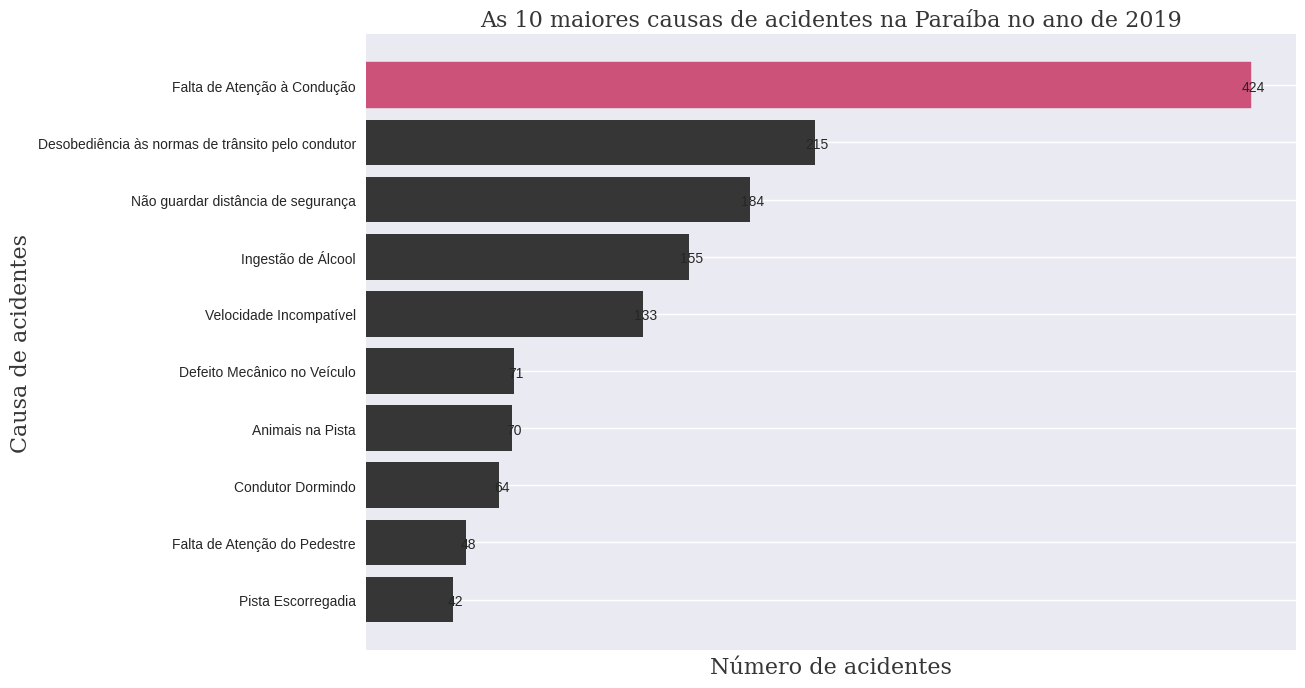

In [22]:
fig = plt.subplots(figsize = (12, 8))

df_graph = causas_acidentes_pb.iloc[:10, :].sort_values('count', ascending=True).reset_index(drop=True)
#grafico_simples(df_graph, 'causa_acidente', 'mortos', 'Gráfico de causas de acidente 2011')

plt.title('As 10 maiores causas de acidentes na Paraíba no ano de 2019', fontdict=font)
barlist = plt.barh(df_graph['causa_acidente'], df_graph['count'].values, color=book_colors['preto'])
barlist[-1].set_color(book_colors['rosa_escuro'])

plt.xlabel('Número de acidentes', fontdict=font)
plt.xticks([])
plt.ylabel('Causa de acidentes', fontdict=font)

for i in range(len(df_graph['count'].values)):
        plt.text(df_graph['count'].values[i] + 1.2, i - 0.1, df_graph['count'].values[i], ha = 'center')


plt.show()

In [23]:
acidentes_by_uf = df_sem_duplicatas.groupby('uf')['count'].sum().reset_index()
acidentes_by_uf = acidentes_by_uf.sort_values('count', ascending=False).reset_index(drop=True)
acidentes_by_uf

,uf,count
0,MG,283787
1,SC,217169
2,PR,205369
3,RJ,168295
4,RS,153731
5,SP,145721
6,BA,108473
7,GO,89938
8,ES,82716
9,PE,79354


### Os 5 estados que acontecem mais acidentes + PB

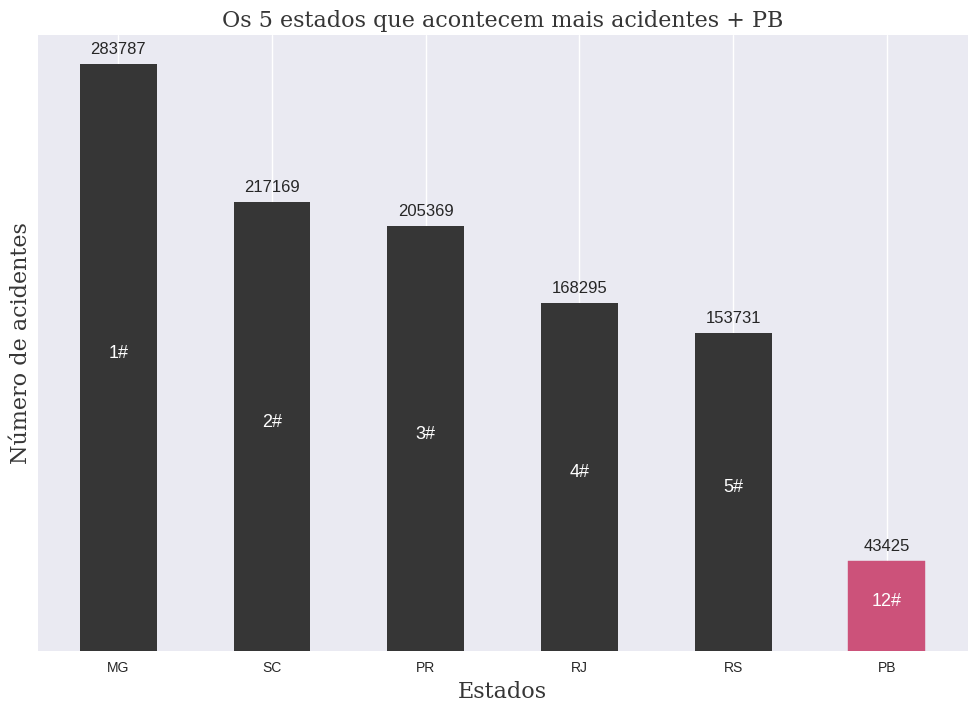

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))
posicao = ['1#', '2#', '3#', '4#', '5#', '12#']

df_5_estados = acidentes_by_uf.loc[acidentes_by_uf['uf'].isin(['MG', 'SC', 'PR', 'RJ', 'RS', 'PB'])]
X, Y = df_5_estados['uf'], df_5_estados['count'].values

clrs = ['grey' if (x < max(X)) else 'red' for x in X ]

plt.title('Os 5 estados que acontecem mais acidentes + PB', fontdict=font)
barlist = plt.bar(X, Y, color=book_colors['preto'], width=0.5)
barlist[5].set_color(book_colors['rosa_escuro'])

for i in range(len(X)):
        plt.text(i, Y[i] + 5000 , Y[i], ha = 'center', fontsize=12)
for i in range(len(posicao)):
        plt.text(i, Y[i] / 2, posicao[i], ha = 'center', fontsize=13, color='white')
        
plt.xlabel('Estados', fontdict=font)
plt.ylabel('Número de acidentes', fontdict=font)
plt.yticks([])
plt.show()

## Gráficos da Paraiba

In [25]:
df_sem_duplicatas_PB = df_sem_duplicatas.loc[df_sem_duplicatas['uf'] == 'PB'].reset_index(drop=True)

In [26]:
df_sem_duplicatas_PB['municipio'] = df_sem_duplicatas_PB['municipio'].map(lambda nome: nome.strip())

In [27]:

df_pessoas = df_sem_duplicatas_PB.groupby(['ano'])['pessoas'].sum().reset_index()
df_mortos = df_sem_duplicatas_PB.groupby(['ano'])['mortos'].sum().reset_index()
df_feridos = df_sem_duplicatas_PB.groupby(['ano'])['feridos'].sum().reset_index()
df_ilesos = df_sem_duplicatas_PB.groupby(['ano'])['ilesos'].sum().reset_index()
df_ignorados = df_sem_duplicatas_PB.groupby(['ano'])['ignorados'].sum().reset_index()


anos = df_mortos['ano'].values
anos = [str(ano) for ano in anos]

In [28]:
df_total_pessoas = pd.concat([df_pessoas, 
                              df_mortos.drop(columns=['ano']), 
                               df_ignorados.drop(columns=['ano']),
                              df_feridos.drop(columns=['ano']), 
                              df_ilesos.drop(columns=['ano'])], axis=1)

In [29]:
df_total_pessoas

,ano,pessoas,mortos,ignorados,feridos,ilesos
0,2007,5853,164,173,1898,3618
1,2008,7027,185,345,2130,4366
2,2009,7592,202,372,2314,4703
3,2010,8048,194,443,2315,5096
4,2011,8202,176,449,2429,5148
5,2012,8542,223,430,2565,5324
6,2013,8973,180,539,2681,5573
7,2014,7740,182,428,2383,4746
8,2015,5874,170,393,2075,3235
9,2016,4335,156,394,1790,1995


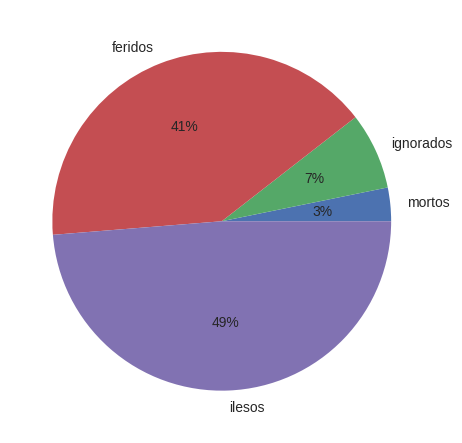

In [30]:
plt.pie(df_total_pessoas.iloc[10, 2:], labels = df_total_pessoas.columns[2:], autopct='%.0f%%')
plt.show()

In [31]:
df_total_pessoas_percent = df_total_pessoas.copy()

df_total_pessoas_percent['mortos'] = df_total_pessoas_percent['mortos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ilesos'] = df_total_pessoas_percent['ilesos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['feridos'] = df_total_pessoas_percent['feridos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ignorados'] = df_total_pessoas_percent['ignorados'] / df_total_pessoas_percent['pessoas']

In [32]:
df_total_pessoas_percent.index = df_total_pessoas_percent['ano']
df_total_pessoas_percent.drop(columns=['ano', 'pessoas'], inplace=True)
df_total_pessoas_percent = df_total_pessoas_percent * 100
df_total_pessoas_percent

,mortos,ignorados,feridos,ilesos
ano,,,,
2007,2.801982,2.955749,32.427815,61.814454
2008,2.632702,4.909634,30.311655,62.131777
2009,2.660695,4.899895,30.479452,61.946786
2010,2.410537,5.504473,28.764911,63.320080
2011,2.145818,5.474275,29.614728,62.765179
2012,2.610630,5.033950,30.028096,62.327324
2013,2.006018,6.006910,29.878524,62.108548
2014,2.351421,5.529716,30.788114,61.317829
2015,2.894110,6.690501,35.325162,55.073204


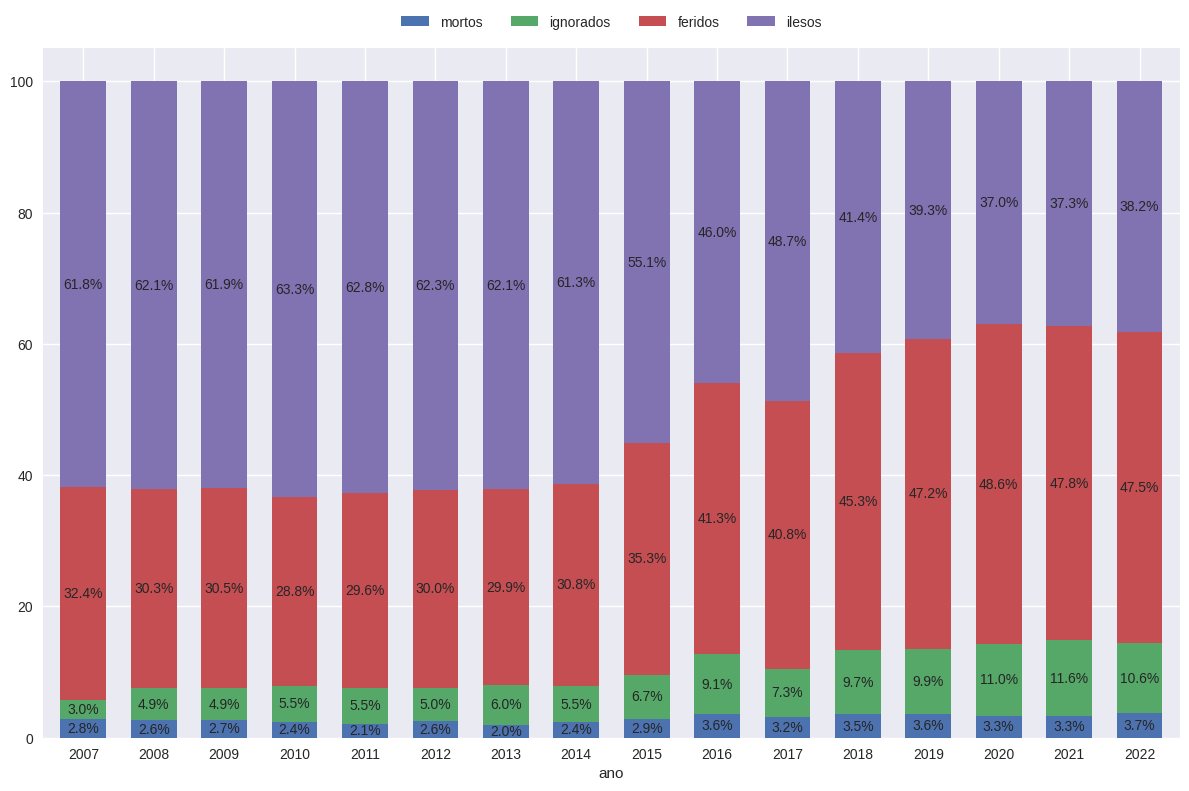

In [33]:
fig, ax = plt.subplots(figsize = (12, 8))

df_total_pessoas_percent.plot.bar(stacked=True, width=0.65, ax = ax)

plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=4,
)

plt.xticks(rotation=-360)

for ix, row in df_total_pessoas_percent.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.01:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{np.round(element, 1)}%",
                va="center",
                ha="center",
            )
        cumulative += element
        
plt.tight_layout()

In [34]:
# grafico_simples(df_pessoas, 'ano', 'pessoas', 
#                 'Quantidade de pessoas que sofreram acidente na PB entre 2007 e 2020')

### Número de mortos, feridos e ilesos a cada ano na Paraíba

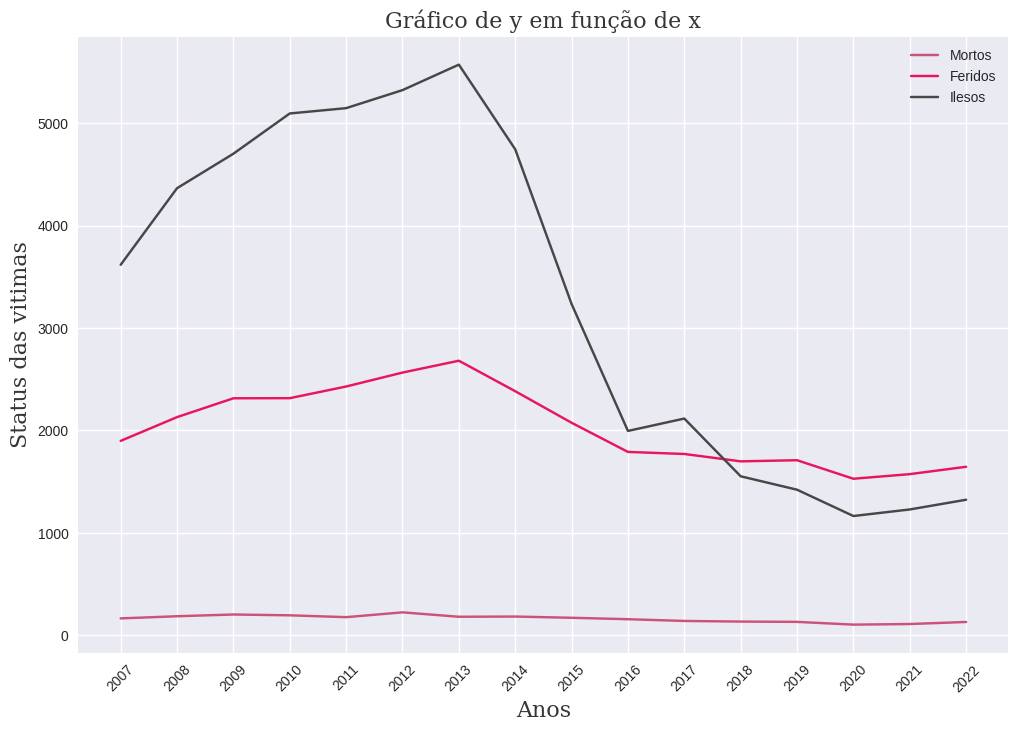

In [35]:
fig = plt.subplots(figsize = (12, 8))

plt.title('Gráfico de y em função de x', fontdict=font)
plt.plot(anos, df_mortos['mortos'].values, color=book_colors['rosa_escuro'], label="Mortos")
plt.plot(anos, df_feridos['feridos'].values, color=book_colors['rosa'], label="Feridos")
plt.plot(anos, df_ilesos['ilesos'].values, color=book_colors['preto_claro'], label="Ilesos")
plt.legend(loc="upper right")
plt.xlabel('Anos', fontdict=font)
plt.ylabel('Status das vitimas', fontdict=font)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
df_sem_duplicatas_PB

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,count
0,332604.0,2021-01-05,terça-feira,14:35:00,PB,101.0,29,RIO TINTO,Condutor Dormindo,Colisão traseira,...,0,1,2,"-6,74032319","-35,13146581",SPRF-PB,DEL01-PB,UOP04-DEL01-PB,2021,1
1,333732.0,2021-01-11,segunda-feira,06:00:00,PB,101.0,"94,7",CONDE,Velocidade Incompatível,Colisão com objeto,...,0,1,1,"-7,21483297","-34,9117521",SPRF-PB,DEL01-PB,UOP02-DEL01-PB,2021,1
2,334493.0,2021-01-15,sexta-feira,07:30:00,PB,230.0,43,SANTA RITA,Velocidade Incompatível,Colisão transversal,...,0,1,2,"-7,1479","-35,0029",SPRF-PB,DEL01-PB,UOP03-DEL01-PB,2021,1
3,335071.0,2021-01-17,domingo,20:00:00,PB,361.0,"108,8",ITAPORANGA,Manobra de mudança de faixa,Colisão lateral sentido oposto,...,1,2,3,"-7,29217614","-38,10235698",SPRF-PB,DEL03-PB,UOP01-DEL03-PB,2021,1
4,335545.0,2021-01-20,quarta-feira,11:20:00,PB,104.0,143,QUEIMADAS,Frear bruscamente,Saída de leito carroçável,...,0,1,1,"-7,40477903","-35,89667929",SPRF-PB,DEL02-PB,UOP03-DEL02-PB,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43420,497325.0,2022-12-07,quarta-feira,22:00:00,PB,101.0,"75,4",CONDE,Restrição de visibilidade em curvas verticais,Atropelamento de Pedestre,...,1,0,1,"-7,229053","-34,919093",SPRF-PB,DEL01-PB,UOP04-DEL01-PB,2022,1
43421,501294.0,2022-12-01,quinta-feira,15:40:00,PB,230.0,18,JOAO PESSOA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,3,"-7,1198","-34,8453",SPRF-PB,DEL01-PB,UOP01-DEL01-PB,2022,1
43422,504303.0,2022-09-04,domingo,02:35:00,PB,230.0,"168,9",CAMPINA GRANDE,Ingestão de álcool pelo condutor,Colisão traseira,...,0,8,3,"-7,186123","-35,9726",SPRF-PB,DEL02-PB,UOP02-DEL02-PB,2022,1
43423,510291.0,2022-07-03,domingo,03:40:00,PB,230.0,314,SAO MAMEDE,Ausência de reação do condutor,Colisão traseira,...,0,1,2,"-6,9412","-37,1016",SPRF-PB,DEL03-PB,UOP01-DEL03-PB,2022,1


In [37]:
def split_time(time):
    
    time_int = int(''.join(time.split(':')[:2]))
    
    if 0 < time_int < 600:
        return '00-06'
    elif 600 < time_int < 800:
        return '06-08'
    elif 800 < time_int < 1200:
        return '08-12'
    elif 1200 < time_int < 1600:
        return '12-16'
    elif 1600 < time_int < 2000:
        return '16-20'
    elif 2000 < time_int < 2400:
        return '20-24'


In [38]:
df_sem_duplicatas_PB['time_split'] = df_sem_duplicatas_PB['horario'].apply(lambda time: split_time(time), 1)

In [39]:
df_sem_duplicatas_PB['time_split'].value_counts()

time_split
16-20    11908
08-12     7816
12-16     7787
20-24     4905
00-06     4632
06-08     4440
Name: count, dtype: int64

In [40]:
import geopandas as gpd

In [42]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [43]:
INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [44]:
df_sem_duplicatas = df_sem_duplicatas.rename(columns={"uf": "sigla"})

In [45]:
df_sem_duplicatas_ufs = df_sem_duplicatas.groupby(['sigla'])['pessoas'].mean().reset_index()
df_sem_duplicatas_ufs = df_sem_duplicatas_ufs.iloc[1:, :].reset_index(drop=True)

In [46]:
df_sem_duplicatas_ufs

,sigla,pessoas
0,AC,2.441232
1,AL,2.275864
2,AM,2.953236
3,AP,2.751638
4,BA,2.361343
5,CE,2.276736
6,DF,2.425600
7,ES,2.193082
8,GO,2.273633
9,MA,2.346196


In [47]:
df_sem_duplicatas_merged = INFOS_UFS.merge(df_sem_duplicatas_ufs, 
                                           on='sigla', 
                                           how='left')

In [48]:
df_sem_duplicatas_merged

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,pessoas
0,Goiás,NaN,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",2.273633
1,Mato Grosso do Sul,NaN,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",2.332398
2,Paraná,NaN,Sim,PR,41,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",2.187891
3,Minas Gerais,NaN,Sim,MG,31,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",2.104289
4,Sergipe,NaN,Sim,SE,28,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",2.265853
5,Alagoas,NaN,Sim,AL,27,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",2.275864
6,Tocantins,NaN,Sim,TO,17,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",2.386317
7,Roraima,NaN,Sim,RR,14,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",2.643294
8,Amazonas,NaN,Sim,AM,13,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",2.953236
9,Acre,NaN,Sim,AC,12,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",2.441232


<Axes: >

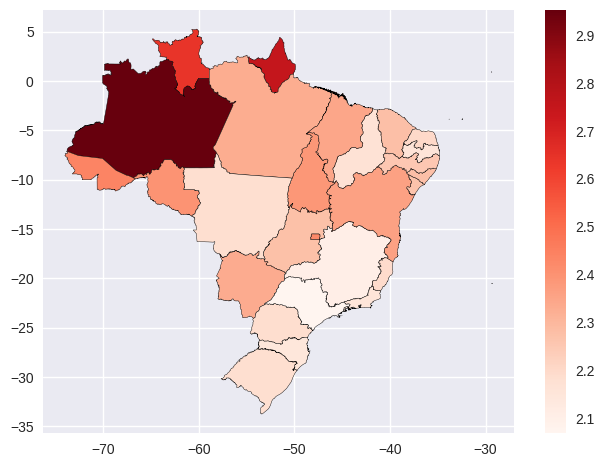

In [49]:
df_sem_duplicatas_merged.plot(column='pessoas',
                             cmap='Reds',
                             legend=True,
                             edgecolor='black')

In [69]:
df_sem_duplicatas.values[50]

array([331730.0, '2021-01-01', 'sexta-feira', '05:30:00', 'SP', 116.0,
       '453', 'REGISTRO', 'Reação tardia ou ineficiente do condutor',
       'Tombamento', 'Com Vítimas Feridas', 'Amanhecer', 'Crescente',
       'Nublado', 'Dupla', 'Curva', 'Não', 1, 0, 1, 0, 0, 0, 1, 1,
       '-24,56168114', '-47,86752174', 'SPRF-SP', 'DEL05-SP',
       'UOP01-DEL05-SP', '2021', 1], dtype=object)

In [62]:
import cartopy.crs as ccrs
import matplotlib

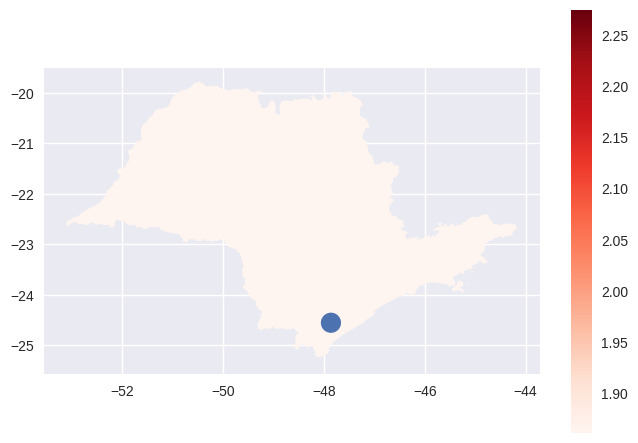

In [88]:
ax2 = plt.subplot()  #"EPSG:3395"

# usa_main is a geoDataFrame with crs="EPSG:3395"
df_sem_duplicatas_merged.loc[df_sem_duplicatas_merged['sigla'] == 'SP'].plot(column="pessoas", legend=True, 
              cmap=matplotlib.cm.Reds,
              ax=ax2)

drawing_circle = plt.Circle(( -47.86 , -24.56 ), 0.2 )
 
ax2.set_aspect( 1 )
ax2.add_artist( drawing_circle)


In [55]:
df_sem_duplicatas_merged['geometry']

0     MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...
1     MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...
2     MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...
3     MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...
4     MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...
5     MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...
6     MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...
7     MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...
8     MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...
9     MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...
10    MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ...
11    MULTIPOLYGON (((-47.94846 -15.49916, -47.91366...
12    MULTIPOLYGON (((-41.73344 -2.81111, -41.73205 ...
13    MULTIPOLYGON (((-37.21443 -6.03725, -37.20704 ...
14    MULTIPOLYGON (((-40.42389 -2.81130, -40.41525 ...
15    MULTIPOLYGON (((-48.63761 -25.97490, -48.63504...
16    MULTIPOLYGON (((-41.70343 -22.42014, -41.70380...
17    MULTIPOLYGON (((-51.18178 3.90573, -51.136

In [86]:
df_sem_duplicatas_merged.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry',
       'pessoas'],
      dtype='object')